## One sample 𝑡-test

###### PAVAN PYLA


In [1]:
import numpy as np
import scipy.stats as stats
x= [ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,1.45,1.97]
xbar = np.mean(x)                          # sample mean
mu = 1.75                                           # H0 value
s = np.std(x, ddof=1)                                 # sample standard deviation
n = len(x)                                            # sample size
tobs = (xbar - mu) / (s / np.sqrt(n))
print(tobs)

1.1781328444830825


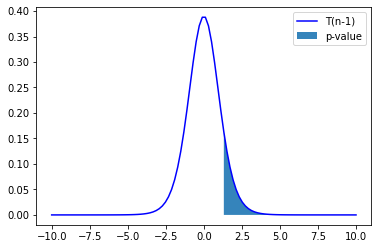

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
                                    #1.1781328444830825
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.9, label="p-value")
plt.legend()

# Testing pairwise associations

## Pearson correlation test

In [5]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

cor, pval = stats.pearsonr(x, y)
print(f"correlation = {cor} , pvalue = {pval}")

correlation = 0.8685768003484347 , pvalue = 3.032888572664233e-16


## Two sample 𝑡-test

In [6]:
import scipy.stats as stats
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87,
                   1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])
grp = np.array(["M"] * 10 + ["F"] * 10)

print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))


Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


##  Chi-square, 𝜒^2


In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
                                                # Dataset:
                                                # 15 samples:
                                                # 10 first with canalar tumor, 5 last without
canalar_tumor = np.array([1] * 10 + [0] * 5)
                                                # 8 first with metastasis, 6 without, the last with.
meta = np.array([1] * 8 + [0] * 6 + [1])
crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[2. 3.]
 [4. 6.]]


In [9]:
#Computing Cross tableau
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()
canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()
print('Canalar tumor frequency? Yes: %.2f' % canalar_tumor_freq[0], 'No: %.2f' %canalar_tumor_freq[1])

Canalar tumor frequency? Yes: 0.33 No: 0.67


In [11]:
print('Metastasis frequency? Yes: %.2f' % meta_freq[0], 'No: %.2f' % meta_freq[1])
print('Expected frequencies:')
print(np.outer(canalar_tumor_freq, meta_freq))
print('Expected cross-table (frequencies * N): ')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))

Metastasis frequency? Yes: 0.40 No: 0.60
Expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]
Expected cross-table (frequencies * N): 
[[2. 3.]
 [4. 6.]]
